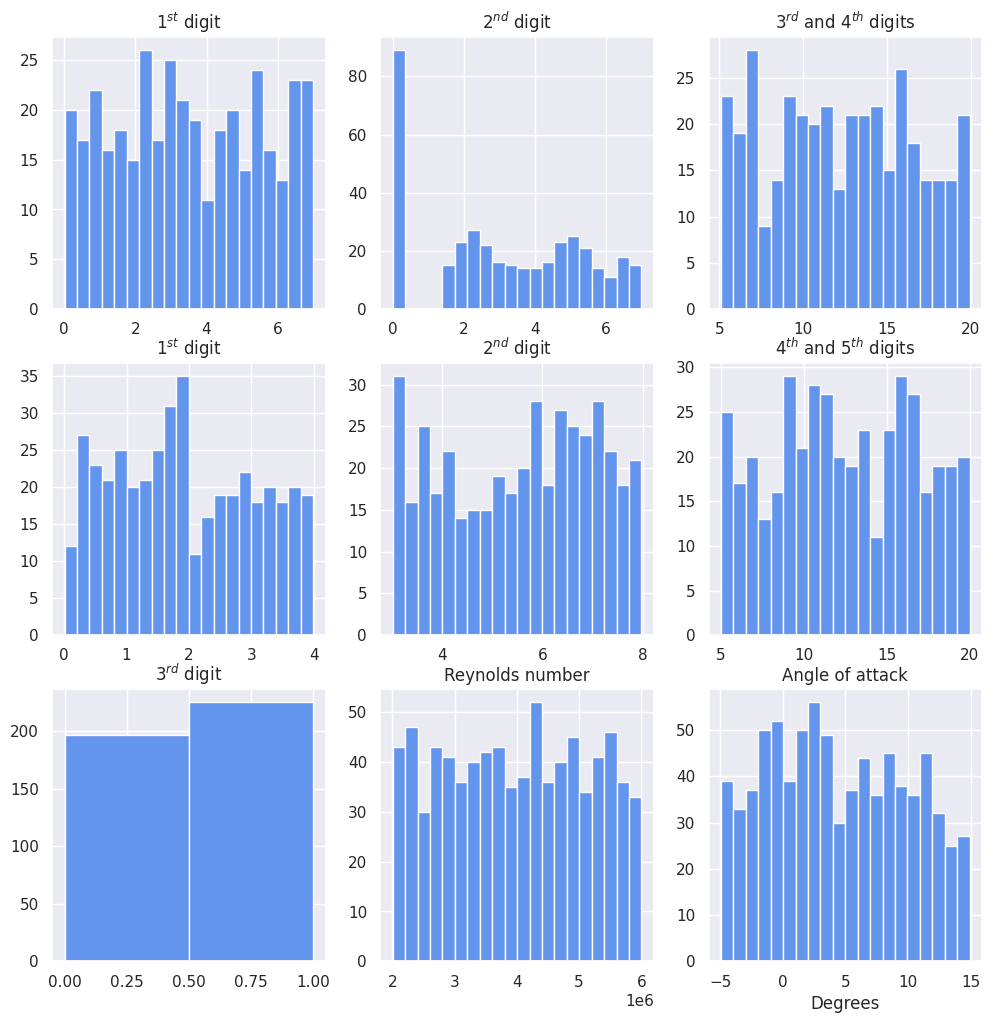

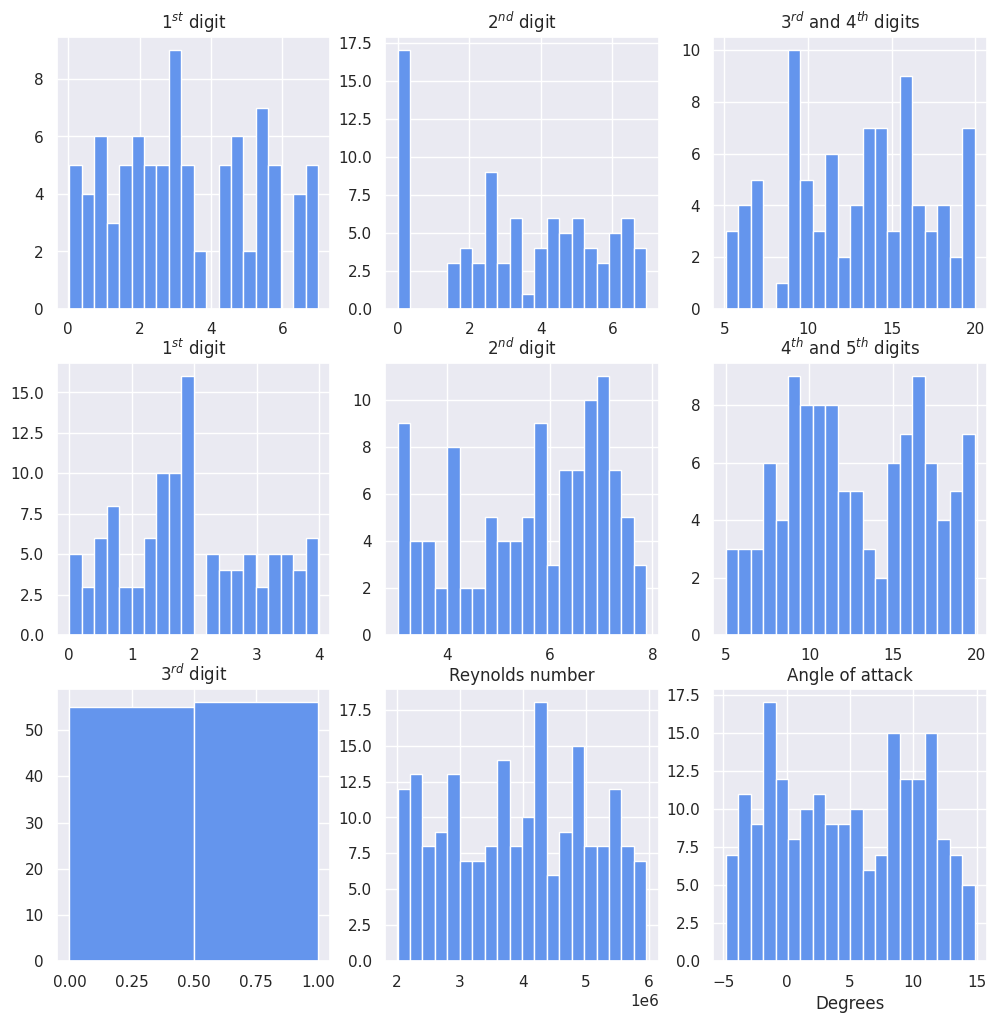

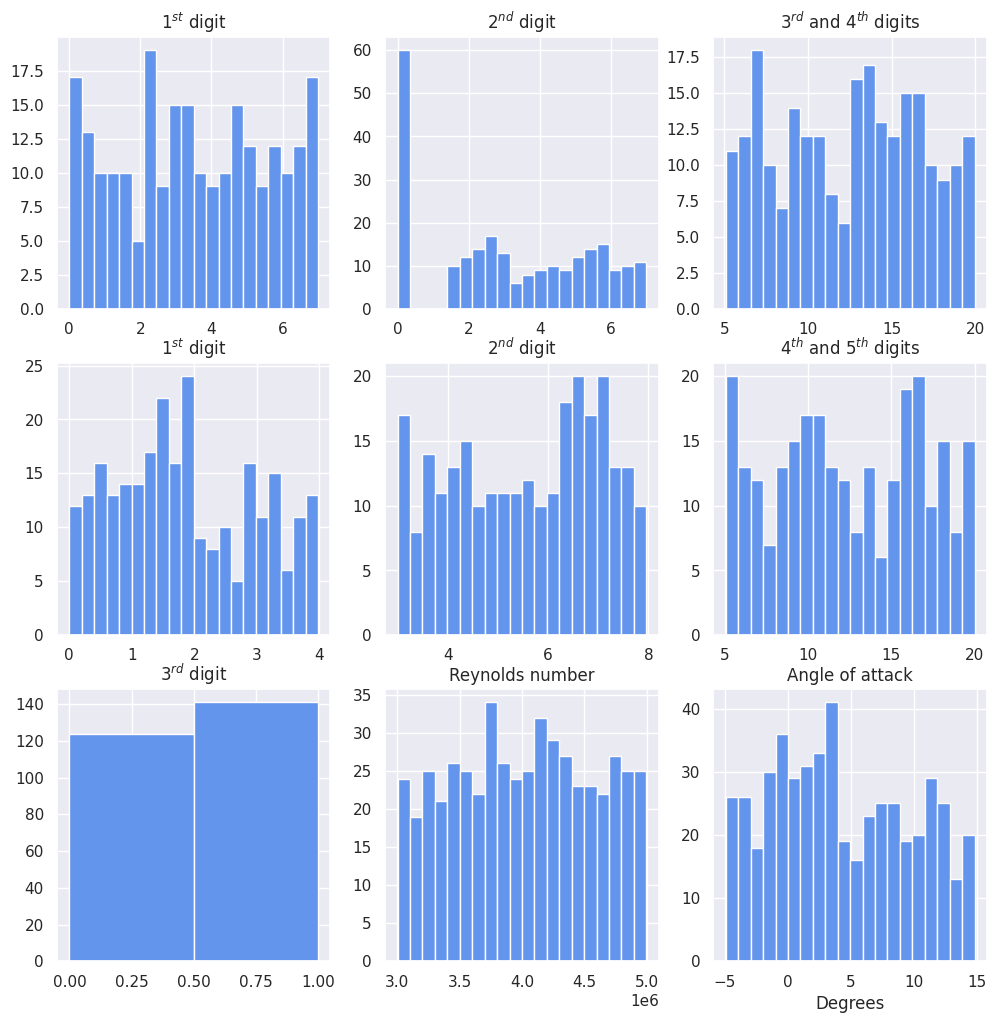

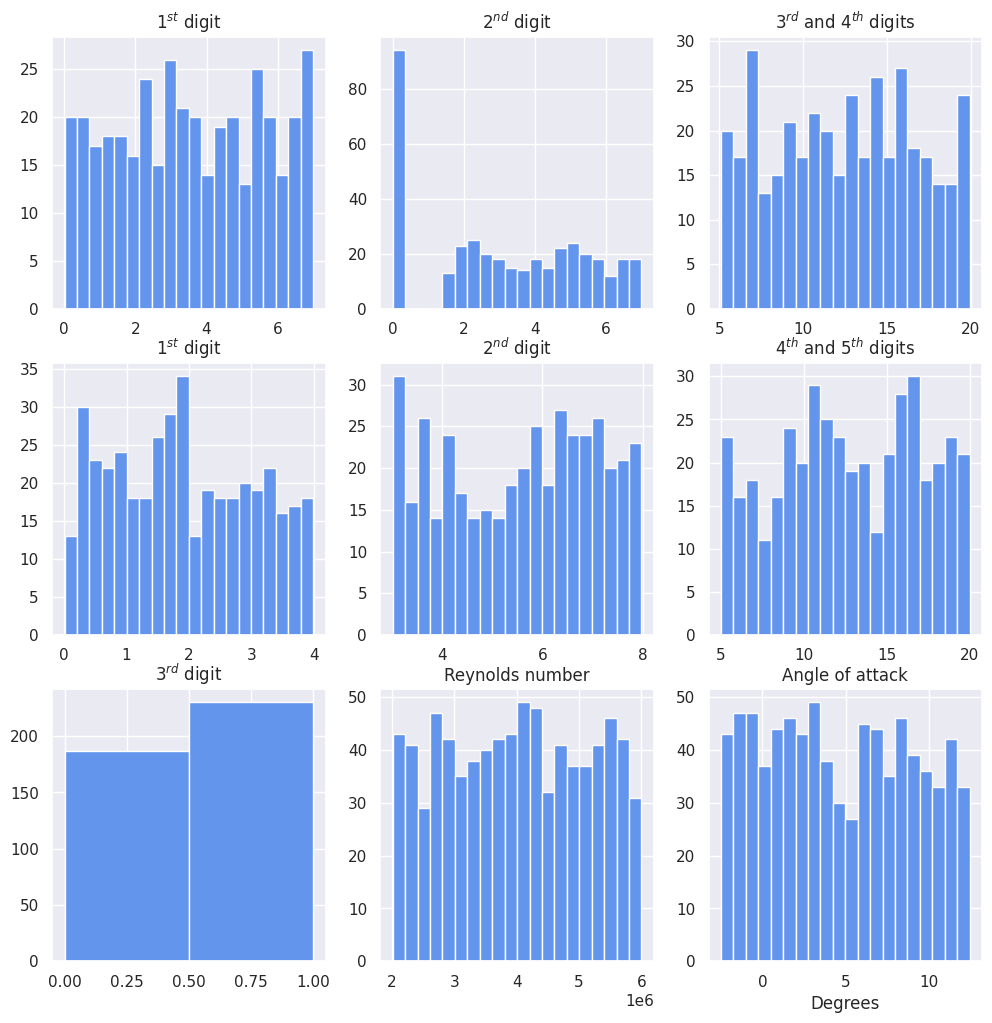

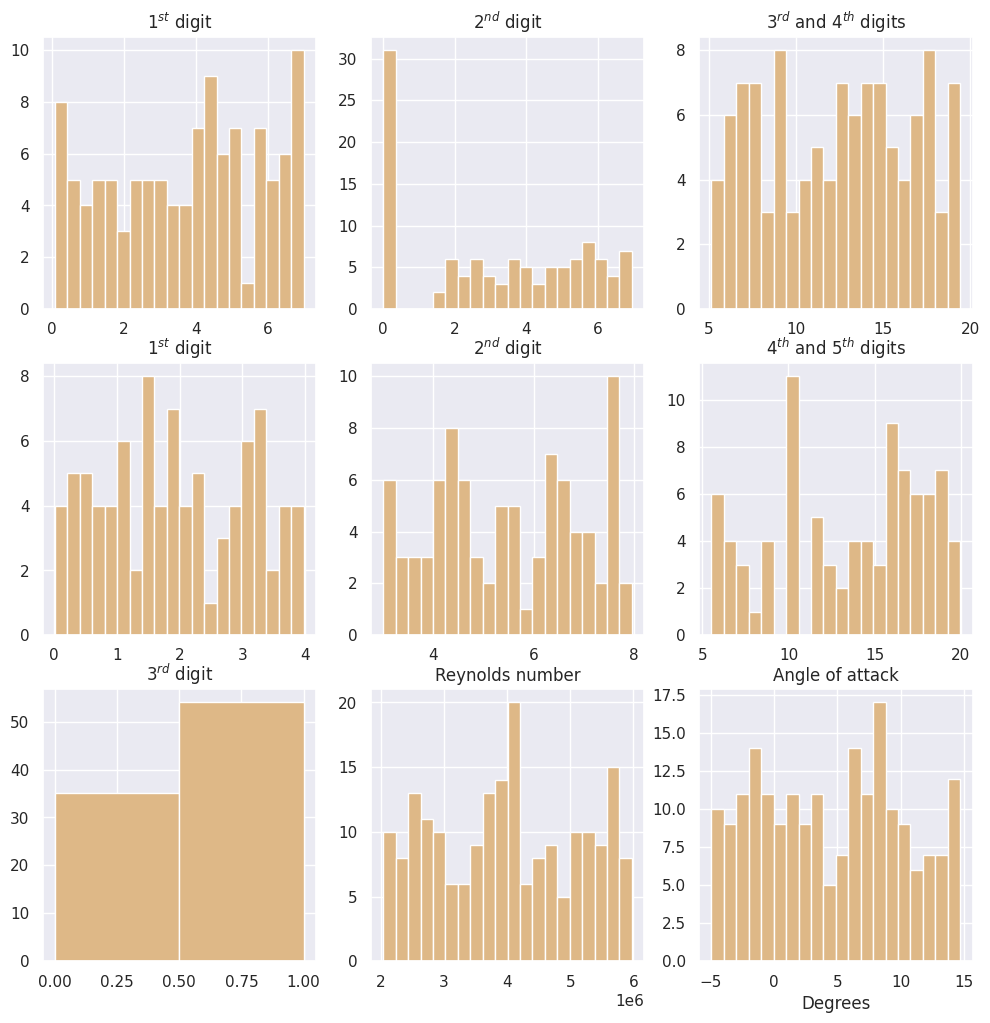

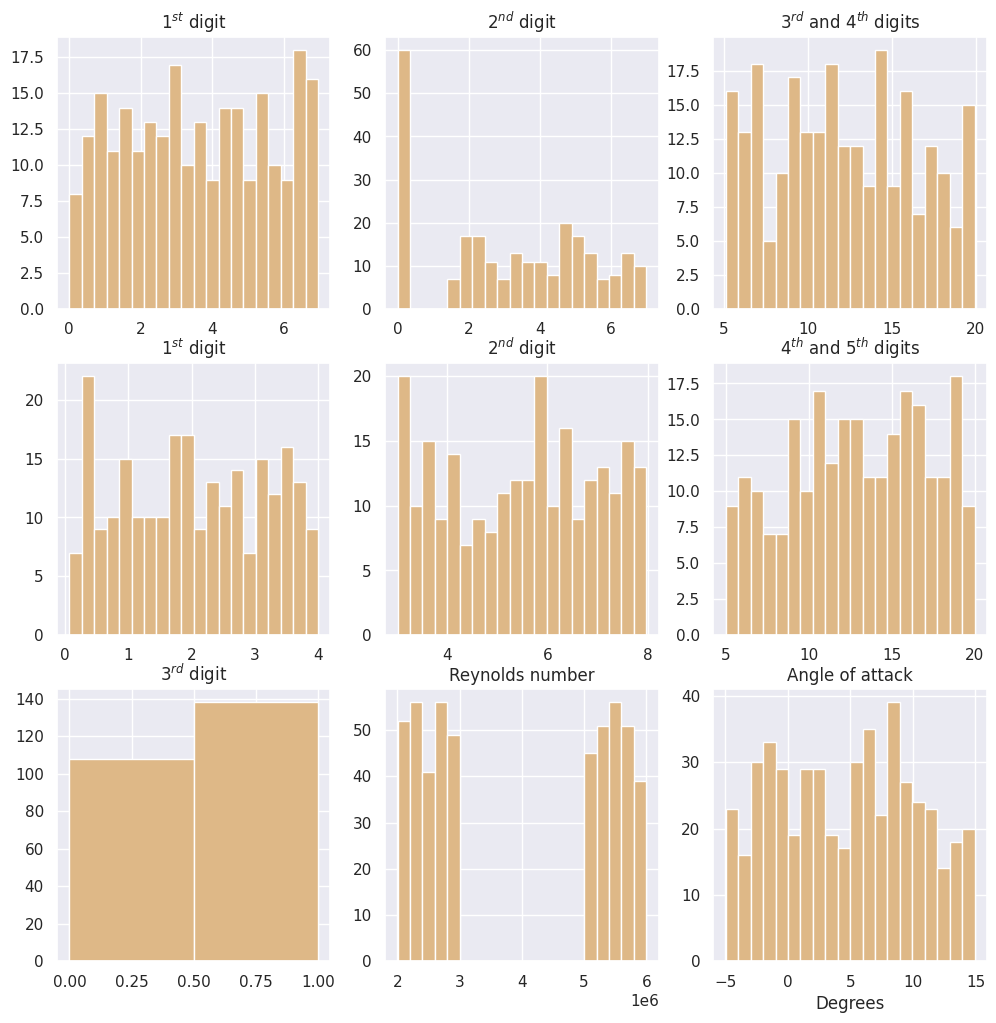

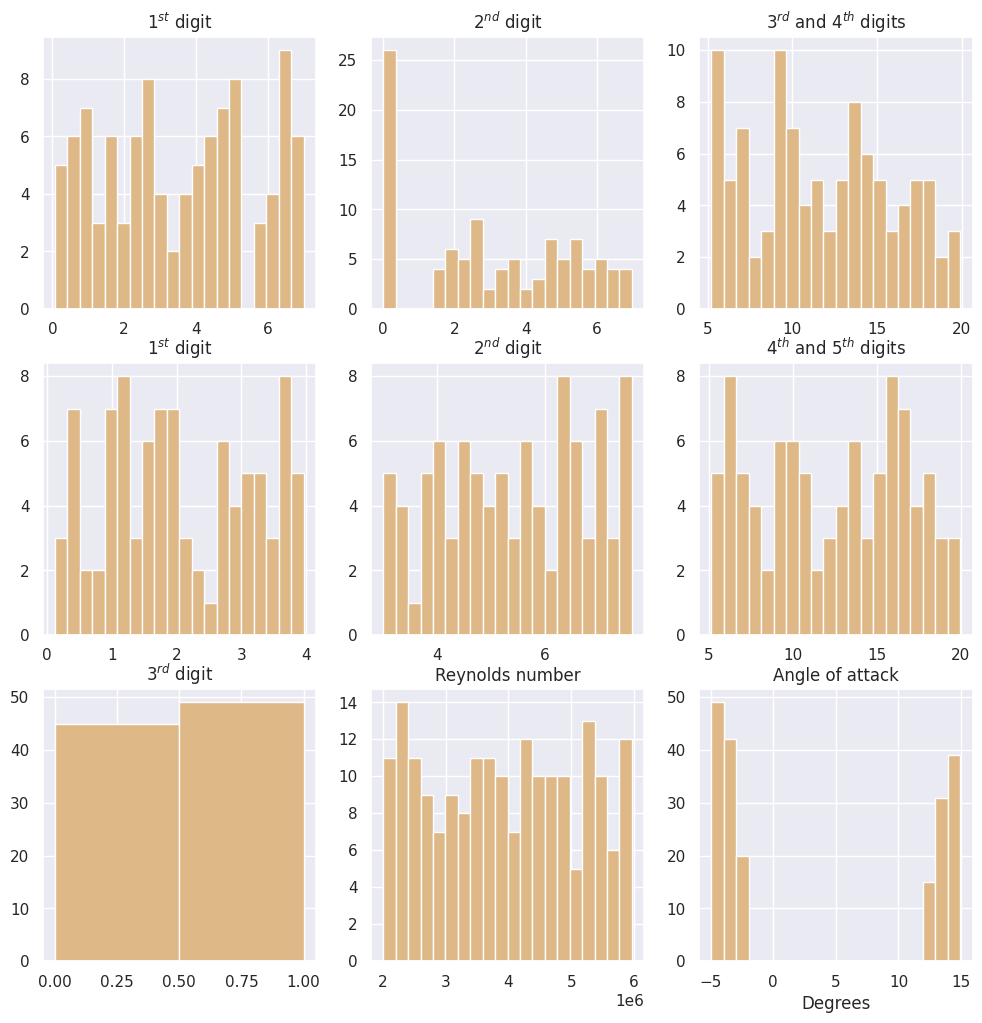

In [1]:
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
import os.path as osp

NU = 1.56e-5

sets = ['full_train', 'scarce_train', 'reynolds_train', 'aoa_train', 'full_test', 'reynolds_test', 'aoa_test']
colors = ['cornflowerblue']*4 + ['burlywood']*3
data_dir = './Dataset'

for c, s in zip(colors, sets):
    with open(osp.join(data_dir, 'manifest.json'), 'r') as f:
        manifest = json.load(f)[s]

    us = []
    angles = []
    digits4 = []
    digits5 = []
    for sim in manifest:
        params = sim.split('_')
        us.append(float(params[2])/NU)
        angles.append(float(params[3]))

        if len(params) == 7:
            digits4.append(list(map(float, params[-3:])))
        else:
            digits5.append(list(map(float, params[-4:])))

    digits4 = np.array(digits4)
    digits5 = np.array(digits5)

    sns.set()

    fig, ax = plt.subplots(3, 3, figsize = (12, 12))
    ax[2, 1].hist(us, bins = 20, color = c)
    ax[2, 1].set_title('Reynolds number')

    ax[2, 2].hist(angles, bins = 20, color = c)
    ax[2, 2].set_xlabel('Degrees')
    ax[2, 2].set_title('Angle of attack')

    ax[0, 0].hist(digits4[:, 0], bins = 20, color = c)
    ax[0, 0].set_title(r'$1^{st}$ digit')

    ax[0, 1].hist(digits4[:, 1], bins = 20, color = c)
    ax[0, 1].set_title(r'$2^{nd}$ digit')

    ax[0, 2].hist(digits4[:, 2], bins = 20, color = c)
    ax[0, 2].set_title(r'$3^{rd}$ and $4^{th}$ digits')

    ax[1, 0].hist(digits5[:, 0], bins = 20, color = c)
    ax[1, 0].set_title(r'$1^{st}$ digit')

    ax[1, 1].hist(digits5[:, 1], bins = 20, color = c)
    ax[1, 1].set_title(r'$2^{nd}$ digit')

    ax[2, 0].hist(digits5[:, 2], bins = 2, color = c)
    ax[2, 0].set_title(r'$3^{rd}$ digit')

    ax[1, 2].hist(digits5[:, 3], bins = 20, color = c)
    ax[1, 2].set_title(r'$4^{th}$ and $5^{th}$ digits');
    fig.savefig(s, bbox_inches = 'tight', dpi = 150)